# Librerias

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#Data viz
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Lectura

In [2]:
train_df = pd.read_csv('../data/train_df.csv')
test_df = pd.read_csv('../data/test_df.csv')

In [6]:
X_train , y_train = train_df.drop(columns=['status']), train_df.status
X_test , y_test = test_df.drop(columns=['status']), test_df.status

In [7]:
X_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,month,day_of_month,day_of_year,week_of_month,week_of_year,day_of_week,year,is_wknd,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,lead_time_transf,type_of_meal_plan_Not Selected,type_of_meal_plan_other,room_type_reserved_Room_Type 4,room_type_reserved_other,market_segment_type_Online,market_segment_type_other,avg_price_per_room_mm
0,2,0,1,2,0,0,0,0,1,3,14,73,2,11,3,2018,0,1,0,0,0,0,0,0,-0.34,1,0,0,0,1,0,0.31
1,1,0,0,2,0,0,0,0,1,8,7,219,1,32,1,2017,0,3,0,0,0,0,0,0,-1.99,0,0,0,0,1,0,0.36
2,2,0,0,2,0,0,0,0,1,10,21,294,3,42,7,2018,1,4,0,0,0,0,0,0,-0.24,0,0,0,0,1,0,0.84
3,3,0,2,1,0,0,0,0,1,9,11,254,2,37,2,2018,0,3,0,0,0,0,0,0,-0.13,0,0,1,0,1,0,0.89
4,2,1,2,5,0,0,0,0,1,3,15,74,3,11,4,2018,0,1,0,0,0,0,0,0,-0.15,0,0,1,0,1,0,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594,2,0,1,0,0,0,0,0,0,5,2,122,1,18,3,2018,0,2,0,0,0,0,0,0,0.49,0,0,0,0,1,0,0.64
3595,2,0,2,2,0,0,0,0,0,3,25,84,4,12,7,2018,1,1,0,0,0,0,0,0,-1.32,0,0,1,0,1,0,0.85
3596,2,1,1,3,0,0,0,0,2,12,26,360,4,52,3,2018,0,4,0,0,0,0,0,0,0.79,0,0,1,0,1,0,0.52
3597,1,0,0,4,0,0,0,0,1,5,18,138,3,20,5,2018,1,2,0,0,0,0,0,0,-0.96,0,0,0,0,0,0,0.32


# Seleccion de variables

In [32]:
X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])

Select K best

In [34]:
from sklearn.feature_selection import SelectKBest, f_classif

kbest = SelectKBest(f_classif, k=15)
X_kbest = kbest.fit_transform(X, y)
variables_seleccionadas = [nombre for i, nombre 
                           in enumerate(X.columns) 
                           if kbest.get_support()[i]]

variables_seleccionadas

['no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'repeated_guest',
 'no_of_previous_bookings_not_canceled',
 'no_of_special_requests',
 'day_of_week',
 'year',
 'is_wknd',
 'lead_time_transf',
 'type_of_meal_plan_Not Selected',
 'market_segment_type_Online',
 'market_segment_type_other',
 'avg_price_per_room_mm']

Mutual info

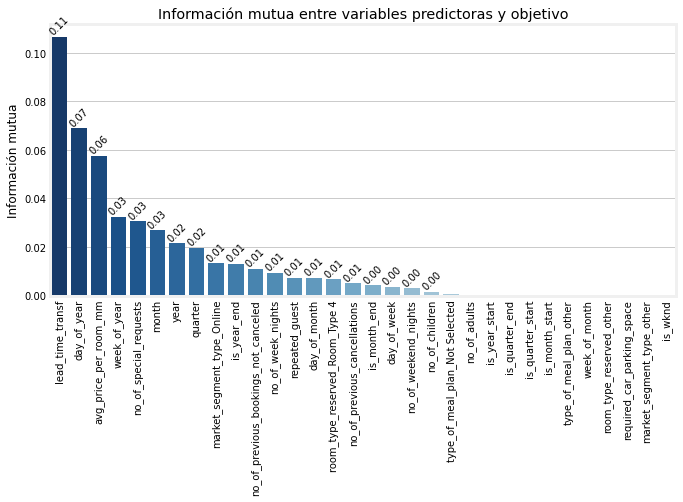

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information
mutual_info = mutual_info_classif(X, y)

# Create a DataFrame for easy data handling
mutual_info_df = pd.Series(mutual_info)
mutual_info_df.index = X.columns

# Sort and create the bar plot using Seaborn
sorted_mutual_info_df = mutual_info_df.sort_values(ascending=False)
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=sorted_mutual_info_df.index, y=sorted_mutual_info_df.values, palette='Blues_r')
ax.set_facecolor('white')
plt.xticks(rotation=90)
plt.ylabel('Información mutua')
plt.title("Información mutua entre variables predictoras y objetivo")

# Add the values at the top of each bar
for i, v in enumerate(sorted_mutual_info_df):
    if v > 0.001:
        ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', rotation=45)

plt.show()


Seleccion final

In [66]:
lista_mutual_info = sorted_mutual_info_df[sorted_mutual_info_df>0].index.tolist()

In [75]:
variables_finales = set(lista_mutual_info).intersection(variables_seleccionadas)

# Preparacion para modelos

In [76]:
X_train = X_train[variables_finales]
X_test = X_test[variables_finales]

In [78]:
variables_finales

{'avg_price_per_room_mm',
 'day_of_week',
 'lead_time_transf',
 'market_segment_type_Online',
 'no_of_children',
 'no_of_previous_bookings_not_canceled',
 'no_of_special_requests',
 'no_of_week_nights',
 'no_of_weekend_nights',
 'repeated_guest',
 'type_of_meal_plan_Not Selected',
 'year'}

In [77]:
X_train.shape, X_test.shape

((3599, 12), (900, 12))

# Regresion logistica